<a href="https://colab.research.google.com/github/paolo0o0/computational_math/blob/main/2lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

time = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21])
T = np.array([296, 520, 744, 982, 1248, 1570, 2256, 2256, 2256])

'''Вычислим первые разделённые разности, чтобы понять,
между какими точками следует искать t* '''

b1 = np.array([(T[i + 1] - T[i]) / (time[i + 1] - time[i]) for i in range(
    len(time) - 1)])
b1

array([112., 112., 119., 133., 161., 343.,   0.,   0.])

In [106]:
'''Видим, что максимальная скачок наблюдается между 15 и 17 секундами
значит между этими точками будет лежать t* в которой производная максимальна.
Построим интерполяционные многочлен в форме Ньютона
по точками 11, 13, 15, 17, 19, 21'''

b1 = b1[3:]
print(f'Первые разделёные разности: {b1}')
b2 = np.array([(b1[i + 1] - b1[i]) / (time[6] - time[4]) for i in range(4)])
print(f'Вторые разделёные разности: {b2}')

Первые разделёные разности: [133. 161. 343.   0.   0.]
Вторые разделёные разности: [  7.    45.5  -85.75   0.  ]


In [107]:
b3 = np.array([(b2[i + 1] - b2[i]) / (time[6] - time[3]) for i in range(3)])
print(f'Третьи разделёные разности: {b3}')
b4 = np.array([(b3[i + 1] - b3[i]) / (time[6] - time[2]) for i in range(2)])
print(f'Четвёртые разделённые разности: {b4}')
b5 = (b4[1] - b4[0]) / (time[6] - time[1])
print(f'Пятая   разделённая разность: {b5}')

def polinom4(x):
    # Многочлен 4-й степени по точкам 13, 15, 17, 19
    return 1248 + 161 * (x - 13) + 45.5 * (x - 13) * (x - 15) - \
           21.875 * (x - 13) * (x - 15) * (x - 17) + \
           4.52 * (x - 13) * (x - 15) * (x - 17) * (x - 19)

def derivative(x):
    # Производная многочлена
    return 91 * x - 1113 - \
    21.875 * (2 * x * x - 34 * x - 28 * x + 476 + x * x - 28 * x + 195) + \
    4.52 * (2 * x * x * x - 72 * x * x + 646 * x - 28 * x * x + 1008 * x - \
    9044 + 2 * x * x * x - 56 * x * x + 390 * x - 36 * x * x + 1008 * x - 7020)


Третьи разделёные разности: [  6.41666667 -21.875       14.29166667]
Четвёртые разделённые разности: [-3.53645833  4.52083333]
Пятая   разделённая разность: 0.8057291666666666


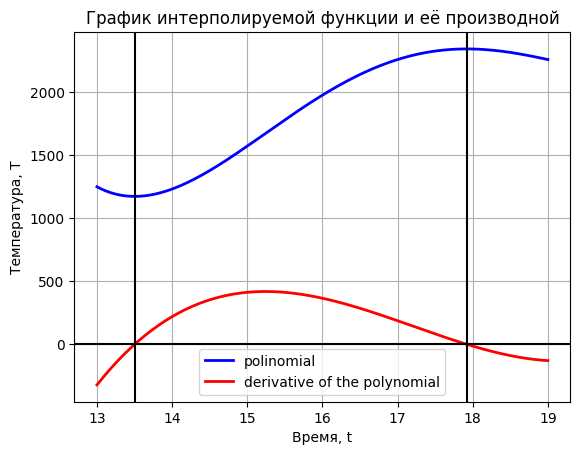

In [108]:
first_nulls = np.array([])
second_nulls = np.array([])
for i in np.linspace(13, 14, num=2000):
    if np.absolute(derivative(i)) <= 2e-1:
        first_nulls = np.append(first_nulls, i)
for i in np.linspace(17, 19, num=2000):
    if np.absolute(derivative(i)) <= 2e-2:
        second_nulls = np.append(second_nulls, i)

plt.plot(np.linspace(13, 19, num=200), polinom4(np.linspace(13, 19, num=200)),
         linewidth=2, color='b', label='polinomial')
plt.plot(np.linspace(13, 19, num=200), derivative(np.linspace(13, 19, num=200)),
         linewidth=2, color='r', label='derivative of the polynomial')

plt.axvline(x = first_nulls[0], color = 'black')
plt.axvline(x = second_nulls[0], color = 'black')
plt.axhline(y=0, color='black')
plt.title('График интерполируемой функции и её производной')
plt.xlabel('Время, t')
plt.ylabel('Температура, T')
plt.grid(True)
plt.legend()
plt.show()

In [109]:
# Найдем точку, в которой производная максимальна
for i in np.linspace(13, 19, num=200):
    if derivative(i) == derivative(np.linspace(13, 19, num=200)).max():
        founded_time = i
founded_time

15.231155778894472

In [111]:
#Погрешность метода
sigma = (b5 / (5 * 4 * 3 * 2)) * (founded_time - time[4]) * \
 (founded_time - time[5]) * (founded_time - time[6]) * \
  (founded_time - time[7]) * (founded_time - time[8])
print(sigma)

-0.1331769527933134


In [128]:
def lagrange_polynomial(x):
    return 982 * ((x - 13) * (x - 15) * (x - 17) * (x - 19)) / \
     ((11 - 13) * (11 - 15) * (11 - 17) * (11 - 19) * (11 - 21)) + \
    1248 * ((x - 11) * (x - 15) * (x - 17) * (x - 19)) / \
     ((13 - 11) * (13 - 15) * (13 - 17) * (13 - 19)) + \
    1570 * ((x - 11) * (x - 13) * (x - 17) * (x - 19)) / \
     ((15 - 11) * (15 - 13) * (15 - 17) * (15 - 19)) + \
    2256 * ((x - 11) * (x - 13) * (x - 15) * (x - 19)) / \
     ((17 - 11) * (17 - 13) * (17 - 15) * (17 - 19)) + \
    2256 * ((x - 11) * (x - 13) * (x - 15) * (x - 17)) / \
     ((19 - 11) * (19 - 13) * (19 - 15) * (19 - 17))

def lagrange_derivative(x):
    return (-1/1920)*(491 * (x - 15) * (x - 17) * (x - 19) + \
    491 * (x - 13) * (x - 17) * (x - 19) + 491 * (x - 13) * (x - 15) * \
     (x - 19) + 491 * (x - 13) * (x - 15) * (x - 17)) - 13 * (x - 15) * \
      (x - 17) * (x - 19) - 13 * (x - 11) * (x - 17) * (x - 19) - 13 * \
       (x - 11) * (x - 15) * (x - 19) - 13 * (x - 11) * (x - 15) * (x - 17) + \
       (1 / 32) * (785 * (x - 13) * (x - 17) * (x - 19) + 785 * (x - 11) * \
        (x - 17) * (x - 19) + 785 * (x - 11) * (x - 13) * (x - 19) + 785 * \
         (x - 11) * (x - 13) * (x - 17)) - (1 / 2) * (47 * (x - 13) * \
          (x - 15) * (x - 19) + 47 * (x - 11) * (x - 15) * (x - 19) + 47 * \
           (x - 11) * (x - 13) * (x - 19) + 47 * (x - 11) * (x - 13) * \
            (x - 15)) + (1 / 8) * (47 * (x - 13) * (x - 15) * (x - 17) + 47 * \
             (x - 11) * (x - 15) * (x - 17) + 47 * (x - 11) * (x - 13) * \
              (x - 17) + 47 * (x - 11) * (x - 13) * (x - 15))

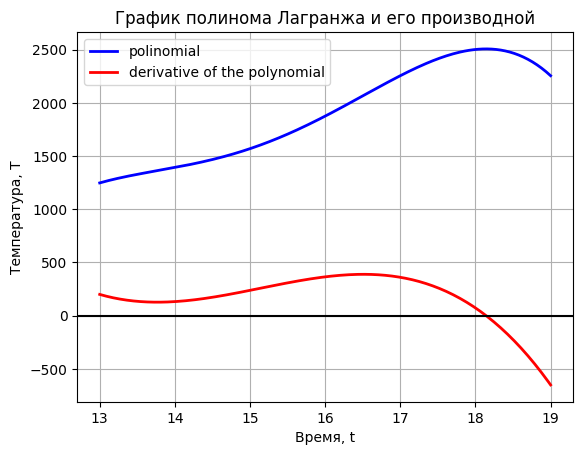

In [129]:

plt.plot(np.linspace(13, 19, num=200), lagrange_polynomial(
    np.linspace(13, 19, num=200)),
         linewidth=2, color='b', label='polinomial')
plt.plot(np.linspace(13, 19, num=200), lagrange_derivative(
    np.linspace(13, 19, num=200)),
         linewidth=2, color='r', label='derivative of the polynomial')
plt.axhline(y=0, color='black')
plt.title('График полинома Лагранжа и его производной')
plt.xlabel('Время, t')
plt.ylabel('Температура, T')
plt.grid(True)
plt.legend()
plt.show()

In [132]:
for i in np.linspace(13, 19, num=200):
    if lagrange_derivative(i) == lagrange_derivative(
                                 np.linspace(13, 19, num=200)).max():
        print(i)

16.49748743718593


1628.7653540959245